import panda to read the CSV dataset file

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('2026 QS World University Rankings.csv')
df.head(10)

,2026 Rank,Previous Rank,Institution Name,Country/Territory,Region,Size,Focus,Research,Status,AR SCORE,...,ISR RANK,ISD SCORE,ISD RANK,IRN SCORE,IRN RANK,EO SCORE,EO RANK,SUS SCORE,SUS RANK,Overall SCORE
0,1,1,Massachusetts Institute of Technology (MIT),United States of America,Americas,M,CO,VH,Private not for Profit,100.0,...,153,92.3,130,94.1,98,100.0,7,93.8,33,100
1,2,2,Imperial College London,United Kingdom,Europe,L,FO,VH,Public,99.6,...,35,100.0,22,97.5,28,95.9,68,98.3,7=,99.4
2,3,6,Stanford University,United States of America,Americas,L,FC,VH,Private not for Profit,100.0,...,261,76.1,230,96.5,49,100.0,2,95.4,19=,98.9
3,4,3,University of Oxford,United Kingdom,Europe,L,FC,VH,Public,100.0,...,80,98.7,67,100.0,1,100.0,3,77.9,198=,97.9
4,5,4,Harvard University,United States of America,Americas,L,FC,VH,Private not for Profit,100.0,...,217,60.6,335,99.4,8,100.0,1,77.8,201=,97.7
5,6,5,University of Cambridge,United Kingdom,Europe,L,FC,VH,Public,100.0,...,144,93.6,120,99.2,12,100.0,5,78.4,194,97.2
6,7,7,ETH Zurich (Swiss Federal Institute of Technol...,Switzerland,Europe,L,FO,VH,Public,99.7,...,58,73.9,241,95.8,64,95.0,76,99.6,2,96.7
7,8,8,National University of Singapore (NUS),Singapore,Asia,XL,FC,VH,Public,99.9,...,101,72.1,253,92.4,140,100.0,9,90.0,63=,95.9
8,9,9,UCL (University College London),United Kingdom,Europe,XL,FC,VH,Public,99.9,...,27,100.0,17,99.9,2,89.3,111,98.5,5=,95.8
9,10,10,California Institute of Technology (Caltech),United States of America,Americas,S,FO,VH,Private not for Profit,98.3,...,161,91.4,136,61.8,665,49.1,352,79.2,185,94.3


Clean and confirm the data

In [3]:
print(df.dtypes)

2026 Rank             object
Previous Rank         object
Institution Name      object
Country/Territory     object
Region                object
Size                  object
Focus                 object
Research              object
Status                object
AR SCORE             float64
AR RANK               object
ER SCORE             float64
ER RANK               object
FSR SCORE            float64
FSR RANK              object
CPF SCORE            float64
CPF RANK              object
IFR SCORE            float64
IFR RANK              object
ISR SCORE            float64
ISR RANK              object
ISD SCORE            float64
ISD RANK              object
IRN SCORE            float64
IRN RANK              object
EO SCORE             float64
EO RANK               object
SUS SCORE            float64
SUS RANK              object
Overall SCORE         object
dtype: object


In [4]:
df['Overall SCORE'] = pd.to_numeric(df['Overall SCORE'], errors='coerce')

In [5]:
df = df.dropna(subset=['Overall SCORE'])

Take the 10 Best Univ per country

In [6]:
df_sorted = df.sort_values(['Country/Territory', 'Overall SCORE'], ascending=[True, False])

In [7]:
top10_per_university = df_sorted.groupby('Country/Territory').head(10)

In [8]:
print(top10_per_university[['Institution Name', 'Country/Territory', 'Overall SCORE']])

                                      Institution Name  \
83                         Universidad de Buenos Aires   
458                   Universidad Nacional de La Plata   
516  Pontificia Universidad Católica Argentina Sant...   
520                    Universidad Austral - Argentina   
18                         The University of Melbourne   
..                                                 ...   
23                            Johns Hopkins University   
651               Universidad de la República (UdelaR)   
470  Tashkent Institute of Irrigation and Agricultu...   
482                                 Duy Tan University   
684                           Ton Duc Thang University   

            Country/Territory  Overall SCORE  
83                  Argentina           72.3  
458                 Argentina           34.0  
516                 Argentina           31.4  
520                 Argentina           31.3  
18                  Australia           90.8  
..                   

In [9]:
top10_per_university.head(10)

,2026 Rank,Previous Rank,Institution Name,Country/Territory,Region,Size,Focus,Research,Status,AR SCORE,...,ISR RANK,ISD SCORE,ISD RANK,IRN SCORE,IRN RANK,EO SCORE,EO RANK,SUS SCORE,SUS RANK,Overall SCORE
83,84,71,Universidad de Buenos Aires,Argentina,Americas,XL,FC,VH,Public,98.1,...,233,80.5,202,75.8,423,99.9,12,66.1,376=,72.3
458,458,534,Universidad Nacional de La Plata,Argentina,Americas,XL,FC,HI,Public,55.7,...,478,31.1,601,54.1,780,37.7,463,39.4,801+,34.0
516,517,481,Pontificia Universidad Católica Argentina Sant...,Argentina,Americas,L,FC,MD,Private not for Profit,30.2,...,801+,11.2,801+,10.5,801+,89.8,108,26.7,801+,31.4
520,519,524,Universidad Austral - Argentina,Argentina,Americas,M,FC,MD,Private not for Profit,29.8,...,786,18.7,784,13.4,801+,69.9,211,29.2,801+,31.3
18,19,13,The University of Melbourne,Australia,Oceania,XL,FC,VH,Public,99.7,...,37,74.4,239,96.9,40,98.3,39,98.2,9=,90.8
19,20,19,The University of New South Wales,Australia,Oceania,XL,FC,VH,Public,96.3,...,41,99.9,30,97.6,25,98.7,32,97.0,12=,90.7
25,25,18,The University of Sydney,Australia,Oceania,XL,FC,VH,Public,98.9,...,18,100.0,12,95.5,71,95.8,70,97.6,11,89.4
31,32,30,Australian National University,Australia,Oceania,L,FC,VH,Public,97.9,...,68,99.1,59,93.1,123,67.1,232,91.8,48,87.4
35,36,37,Monash University,Australia,Oceania,XL,FC,VH,Public,95.7,...,24,100.0,15,94.7,87,86.7,128,91.7,49=,85.8
42,42,40,The University of Queensland,Australia,Oceania,XL,FC,VH,Public,94.3,...,28,100.0,18,97.0,36,66.6,233,92.5,41,85.1


In [10]:
top10_per_university[top10_per_university['Country/Territory'] == 'Indonesia'].head(10)

,2026 Rank,Previous Rank,Institution Name,Country/Territory,Region,Size,Focus,Research,Status,AR SCORE,...,ISR RANK,ISD SCORE,ISD RANK,IRN SCORE,IRN RANK,EO SCORE,EO RANK,SUS SCORE,SUS RANK,Overall SCORE
188,189,206,UNIVERSITAS INDONESIA,Indonesia,Asia,XL,FC,VH,Public,69.9,...,801+,16.3,801+,59.6,701,87.2,124,60.9,486=,57.0
223,224,239,Universitas Gadjah Mada,Indonesia,Asia,XL,FC,VH,Public,70.2,...,801+,14.6,801+,46.3,801+,75.9,177,66.0,381=,53.5
254,255,256,Bandung Institute of Technology (ITB),Indonesia,Asia,L,CO,VH,Public,58.5,...,801+,13.7,801+,39.8,801+,68.6,224,59.2,516=,49.9
287,287,308,Universitas Airlangga,Indonesia,Asia,XL,FC,VH,Public,52.2,...,801+,16.7,801+,52.9,797,24.0,658,56.6,568=,46.8
398,399,426,IPB University (aka Bogor Agricultural Univers...,Indonesia,Asia,L,FO,VH,Public,35.1,...,801+,10.8,801+,26.2,801+,45.3,386,63.2,436=,37.6
508,509,585,Institut Teknologi Sepuluh Nopember (ITS),Indonesia,Asia,L,CO,VH,Public,27.4,...,801+,17.9,800,27.6,801+,17.0,782,52.5,654,31.9
515,515,596,Universitas Padjadjaran (UNPAD),Indonesia,Asia,XL,FO,VH,Public,29.9,...,801+,9.4,801+,31.8,801+,45.4,384,59.7,507=,31.5
623,624,721-730,Diponegoro University,Indonesia,Asia,XL,FC,HI,Public,30.0,...,801+,12.0,801+,35.5,801+,24.2,655,51.0,680=,27.5
682,680,801-850,University of Brawijaya,Indonesia,Asia,XL,FC,HI,Public,30.1,...,801+,6.9,801+,27.3,801+,29.1,567,53.3,636=,25.9


Visualize data

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
ind_top10 = top10_per_university[top10_per_university['Country/Territory'] == 'Indonesia'].head(10)

In [13]:
print(ind_top10[['Institution Name', 'Country/Territory', 'Overall SCORE']])

                                      Institution Name Country/Territory  \
188                              UNIVERSITAS INDONESIA         Indonesia   
223                            Universitas Gadjah Mada         Indonesia   
254              Bandung Institute of Technology (ITB)         Indonesia   
287                              Universitas Airlangga         Indonesia   
398  IPB University (aka Bogor Agricultural Univers...         Indonesia   
508          Institut Teknologi Sepuluh Nopember (ITS)         Indonesia   
515                    Universitas Padjadjaran (UNPAD)         Indonesia   
623                              Diponegoro University         Indonesia   
682                            University of Brawijaya         Indonesia   

     Overall SCORE  
188           57.0  
223           53.5  
254           49.9  
287           46.8  
398           37.6  
508           31.9  
515           31.5  
623           27.5  
682           25.9  


/tmp/ipykernel_5972/2116005720.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ind_top10, x='Overall SCORE', y='Institution Name', palette='viridis')


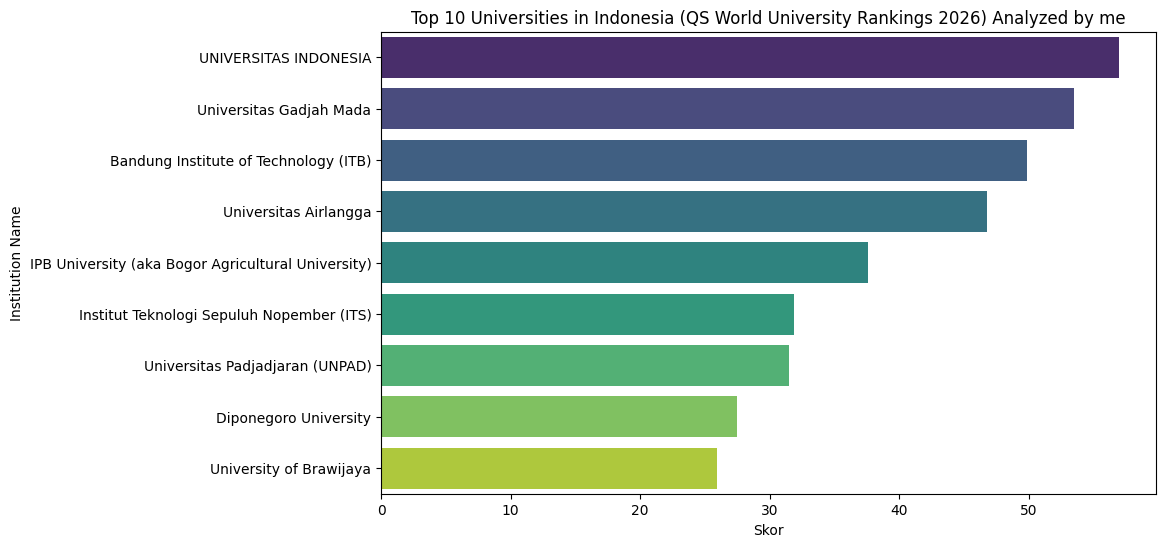

In [14]:
plt.figure(figsize=(10, 6))
sns.barplot(data=ind_top10, x='Overall SCORE', y='Institution Name', palette='viridis')
plt.title('Top 10 Universities in Indonesia (QS World University Rankings 2026) Analyzed by me')
plt.xlabel('Skor')
plt.ylabel('Institution Name')
plt.show()